# Quick Start

This tutorial show how to create a scikit-criteria `Data` structure, and how to feed them inside different multicriteria decisions algorithms.


## Conceptual Overview

The multicriteria data are really complex thing; mostly because you need at least 2 totally disconected vectors to decribe your problem: A alternative matrix (`mtx`) and a vector that indicated the optimal sense of every criteria (`criteria`); also maybe you want to add weights to your criteria

The `skcteria.Data` object need at least the first two to be created and also accepts the weights, the names of the criteria and the names of alternatives as optional parametes.

## Your First Data object

First we need to import the `Data` structure and the `MIN`, `MAX` contants from scikit-criteria:

In [1]:
%matplotlib inline

In [2]:
from skcriteria import Data, MIN, MAX

Then we need to create the `mtx` and `criteria` vectors. 

The `mtx` must be a **2D array-like** where every column is a criteria, and every row is an alternative

In [3]:
# 2 alternatives by 3 criteria
mtx = [
    [1, 2, 3],  # alternative 1
    [4, 5, 6],  # alternative 2
]
mtx

[[1, 2, 3], [4, 5, 6]]

The `criteria` vector must be a **1D array-like** with number of elements same as number of columns in the alternative matrix (`mtx`). Every component of the `criteria` vector represent the optimal sense of each criteria.

In [4]:
# let's says the first two alternatives are 
# for maximization and the last one for minimization
criteria = [MAX, MAX, MIN]
criteria

[1, 1, -1]

as you see the `MAX` and `MIN` constants are only aliases for the numbers `-1` (minimization) and `1` (maximization). As you can see the constants usage makes the code more readable. Also you can use as aliases of minimization and maximization the built-in function `min`, `max`, the numpy function `np.min`, `np.max`, `np.amin`, `np.amax`, `np.nanmin`, `np.nanmax` and the strings `min`, `minimization`, `max` and `maximization`.

Now we can combine this two vectors in our scikit-criteria data.

In [5]:
# we use the built-in function as aliases
data = Data(mtx, [min, max, min])  
data

ALT./CRIT.,C0 (min),C1 (max),C2 (min)
A0,1,2,3
A1,4,5,6


As you can see the output of the `Data` structure is much more friendly than the plain python lists.

To change the generic names of the alternatives (A0 and A1) and the criteria (C0, C1 and C2); let's assume that our Data is about cars (*car 0* and *car 1*) and their characteristics of evaluation are *autonomy* (`MAX`), *comfort* (`MAX`) and *price* (`MIN`). 

To feed this information to our `Data` structure we have the params: `anames` that accept the names of alternatives (must be the same number as the rows that `mtx` has), and `cnames` the criteria names (must have same number of elements with the columns that `mtx` has)

In [6]:
data = Data(mtx, criteria, 
            anames=["car 0", "car 1"], 
            cnames=["autonomy", "comfort", "price"])
data

ALT./CRIT.,autonomy (max),confort (max),price (min)
car 0,1,2,3
car 1,4,5,6


In our final step let's assume we know in our case, that the importance of the autonomy is the *50%*, the comfort only a *5%* and the price is *45%*. The param to feed this to the structure is called `weights` and must be a vector with the same elements as criterias on your alternative matrix (number of columns)

In [7]:
data = Data(mtx, criteria, 
            weights=[.5, .05, .45],
            anames=["car 0", "car 1"], 
            cnames=["autonomy", "comfort", "price"])
data

ALT./CRIT.,autonomy (max) W.0.5,confort (max) W.0.05,price (min) W.0.45
car 0,1,2,3
car 1,4,5,6


## Manipulating the Data

The data object are immutable, if you want to modify it you need create a new one. All the numerical data (mtx, criteria, and weights) are stored as [numpy arrays](https://docs.scipy.org/doc/numpy/user/basics.creation.html), and the alternative and criteria names as python tuples.

You can acces to the different parts of your data, simply by typing `data.<your-parameter-name>` for example:

In [8]:
data.mtx

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
data.criteria

array([ 1,  1, -1])

In [10]:
data.weights

array([0.5 , 0.05, 0.45])

In [11]:
data.anames, data.cnames

(('car 0', 'car 1'), ('autonomy', 'confort', 'price'))

If you want (for example) change the names of the cars from `car 0` and `car 1`; to `VW` and `Ford` you must copy from your original Data

In [12]:
data = Data(data.mtx, data.criteria, 
            weights=data.weights, 
            anames=["VW", "Ford"],
            cnames=data.cnames)
data

ALT./CRIT.,autonomy (max) W.0.5,confort (max) W.0.05,price (min) W.0.45
VW,1,2,3
Ford,4,5,6


<div class="alert alert-info">
**Note:** A more flexible data manipulation API will relased in future versions.
</div>

## Plotting

The Data structure suport some basic rutines for ploting. Actually 5 types of plots are supported:

- [Radar Plot](http://www.datavizcatalogue.com/methods/radar_chart.html) (`radar`).
- [Histogram](http://www.datavizcatalogue.com/methods/histogram.html) (`hist`).
- [Violin Plot](http://www.datavizcatalogue.com/methods/violin_plot.html) (`violin`).
- [Box Plot](http://www.datavizcatalogue.com/methods/box_plot.html) (`box`).
- [Scatter Matrix](http://www.datavizcatalogue.com/methods/scatterplot.html) (`scatter`).

The default scikit criteria uses the Radar Plot to visualize all the data. Take in account that the radar plot by default convert all the minimization criteria to maximization and push all the values to be greater than 1 (obviously all this options can be overided).

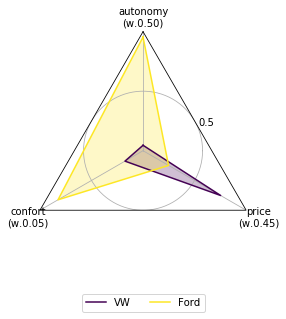

In [13]:
data.plot();

You can accesing the different plot by passing as first parameter the name of the plot

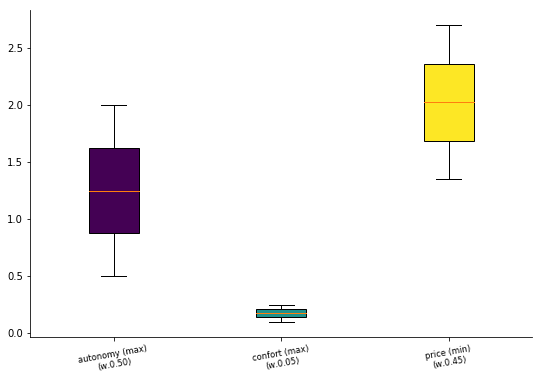

In [14]:
data.plot("box");

or by using the name as method call inside the `plot` attribute

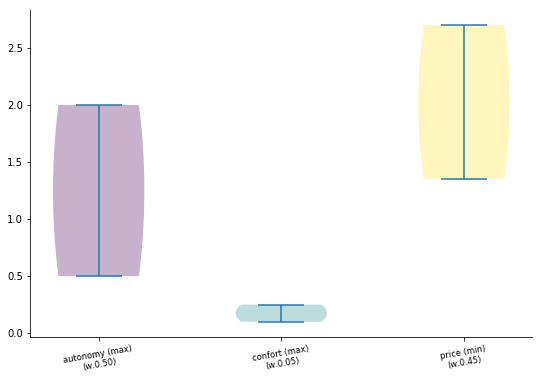

In [15]:
data.plot.violin();

Every plot has their own set of parameters, but at last every one can receive:

- `ax`: The plot axis.
- `cmap`: The color map ([More info](https://matplotlib.org/users/colormaps.html)).
- `mnorm`: The normalization method for the alternative matrix as string (Default: `"none"`).
- `wnorm`: The normalization method for the criteria array as string (Default: `"none"`).
- `weighted`: If you want to weight the criteria (Default: `True`).
- `show_criteria`: Show or not the criteria in the plot (Default: `True` in all except radar).
- `min2max`: Convert the minimization criteria into maximization one (Default: `False` in all except radar).
- `push_negatives`: If a criteria has values lesser than 0, add the minimun value to all the criteria 
  (Default: `False` in all except radar).
- `addepsto0`: If a criteria has values equal to 0, add an $\epsilon$ value to all the criteria 
  (Default: `False` in all except radar).
  
Let's change the colors of the radar plot and show their criteria optimization sense:

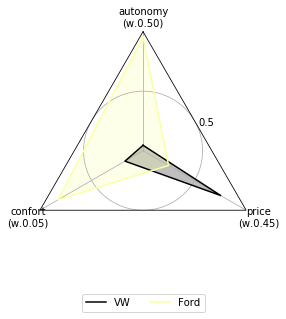

In [16]:
data.plot.radar(cmap="inferno", show_criteria=False);

## Using this data to feed some MCDA methods

Let's rank our dummy data by [Weighted Sum Model](https://en.wikipedia.org/wiki/Weighted_sum_model), [Weighted Product Model](https://en.wikipedia.org/wiki/Weighted_product_model) and [TOPSIS](https://en.wikipedia.org/wiki/TOPSIS)

In [17]:
from skcriteria.madm import closeness, simple

First you need to create the decision maker.

Most of methods accepts hyper parameters (parameters of the to configure the method) as following:
1. the method of normalization of the alternative matrix
  - in Weighted Sum and Weighted Product we use divided by the `sum` normalization
  - in `Topsis` we can also use the `vector` normalization
2. the method to normalize the weight array (normally `sum`); 
But complex methods has more.

### Weighted Sum Model:

In [18]:
# first create the decision maker 
# (with the default hiper parameters)
dm = simple.WeightedSum()
dm

<WeightedSum (mnorm=sum, wnorm=sum)>

In [19]:
# Now lets decide the ranking
dec = dm.decide(data)
dec

ALT./CRIT.,autonomy (max) W.0.5,confort (max) W.0.05,price (min) W.0.45,Rank
VW,1,2,3,1
Ford,4,5,6,2


The result says that the **VW** is better than the **FORD**, lets make the maths:

<div class="alert alert-info">
**Note:** The last criteria is for minimization and because the WeightedSumModel only accepts maximization criteria by default, scikit-criteria invert all the values to convert the criteria to maximization
</div>

In [20]:
print("VW:", 0.5 * 1/5. + 0.05 * 2/7. + 0.45 * 1 / (3/9.))
print("FORD:", 0.5 * 4/5. + 0.05 * 5/7. + 0.45 * 1 / (6/9.))

VW: 1.4642857142857144
FORD: 1.1107142857142858


If you want to acces this points, the `Decision` object stores all the particular information of every method in a 
attribute called `e_`

In [21]:
print(dec.e_)
dec.e_.points

Extra(points)


array([1.46428571, 1.11071429])

Also you can acces the type of the solution

In [22]:
print("Generate a ranking of alternatives?", dec.alpha_solution_)
print("Generate a kernel of best alternatives?", dec.beta_solution_)
print("Choose the best alternative?", dec.gamma_solution_)

Generate a ranking of alternatives? True
Generate a kernel of best alternatives? False
Choose the best alternative? True


The rank as numpy array (if this decision is a $\alpha$-solution / alpha solution)

In [23]:
dec.rank_

array([1, 2])

The index of the row of the best alternative (if this decision is a $\gamma$-solution / gamma solution)

In [24]:
dec.best_alternative_, data.anames[dec.best_alternative_]

(0, 'VW')

And the kernel of the non supered alternatives (if this decision is a  $\beta$-solution / beta solution)

In [25]:
# this return None because this 
# decision is not a beta-solution
print(dec.kernel_)

None


### Weighted Product Model

In [26]:
dm = simple.WeightedProduct()
dm

<WeightedProduct (mnorm=sum, wnorm=sum)>

In [27]:
dec = dm.decide(data)
dec

ALT./CRIT.,autonomy (max) W.0.5,confort (max) W.0.05,price (min) W.0.45,Rank
VW,1,2,3,2
Ford,4,5,6,1


As before let's do the math (remember the weights are now exponents)

In [28]:
print("VW:", ((1/5.) ** 0.5) * ((2/7.) ** 0.05) + ((1 / (3/9.)) ** 0.45))
print("FORD:", ((4/5.) ** 0.5) * ((5/7.) ** 0.05) + ((1 / (6/9.)) ** 0.45))

VW: 2.059534375567646
FORD: 2.07967086650222


As wee expected the **Ford** are little better than the **VW**. Now lets theck the `e_` object

In [29]:
print(dec.e_)
dec.e_.points

Extra(points)


array([-0.16198384,  0.02347966])

As you note the points are differents, this is because internally to avoid [undeflows](https://en.wikipedia.org/wiki/Arithmetic_underflow) Scikit-Criteria uses a sums of logarithms
instead products. So let's check

In [30]:
import numpy as np
print("VW:", 0.5 * np.log10(1/5.) + 0.05 * np.log10(2/7.) + 0.45 * np.log10(1 / (3/9.)))
print("FORD:", 0.5 * np.log10(4/5.) + 0.05 * np.log10(5/7.) + 0.45 * np.log10(1 / (6/9.)))

VW: -0.16198383976167505
FORD: 0.023479658287116456


### TOPSIS

In [31]:
dm = closeness.TOPSIS()
dm

<TOPSIS (mnorm=vector, wnorm=sum)>

In [32]:
dec = dm.decide(data)
dec

ALT./CRIT.,autonomy (max) W.0.5,confort (max) W.0.05,price (min) W.0.45,Rank
VW,1,2,3,2
Ford,4,5,6,1


The TOPSIS add more information into the decision object.

In [33]:
print(dec.e_)
print("Ideal:", dec.e_.ideal)
print("Anti-Ideal:", dec.e_.anti_ideal)
print("Closeness:", dec.e_.closeness)

Extra(ideal, anti_ideal, closeness)
Ideal: [0.48507125 0.04642383 0.20124612]
Anti-Ideal: [0.12126781 0.01856953 0.40249224]
Closeness: [0.35548671 0.64451329]


Where the `ideal` and `anti_ideal` are the normalizated sintetic better and worst altenatives created by TOPSIS, and the `closeness` is how far from the *anti-ideal* and how closer to the *ideal* are the real alternatives

Finally we can change the normalization criteria of the alternative matric to `sum` (divide every value by the sum opf their criteria) and check the result:

In [34]:
dm = closeness.TOPSIS(mnorm="sum")
dm

<TOPSIS (mnorm=sum, wnorm=sum)>

In [35]:
dm.decide(data)

ALT./CRIT.,autonomy (max) W.0.5,confort (max) W.0.05,price (min) W.0.45,Rank
VW,1,2,3,2
Ford,4,5,6,1


The rankin has changed so, we can compare the two normalization by plotting

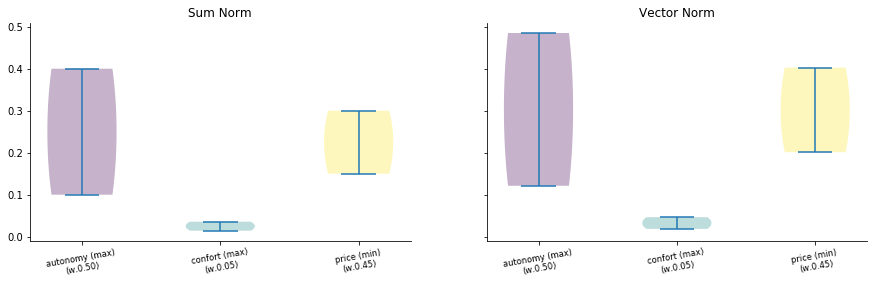

In [36]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title("Sum Norm")
data.plot.violin(mnorm="sum", ax=ax1);

ax2.set_title("Vector Norm")
data.plot.violin(mnorm="vector", ax=ax2);
f.set_figwidth(15)

In [37]:
import datetime as dt
import skcriteria
print("Scikit-Criteria version:", skcriteria.VERSION)
print("Running datetime:", dt.datetime.now())

Scikit-Criteria version: 0.2.10
Running datetime: 2018-06-22 00:59:20.974570
